### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

# Project Completed by Samir Karandikar

### 1. Import the necessary packages - 2.5 marks

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [43]:

Rating  = pd.read_csv('Data.csv')
Movie  = pd.read_csv('item.csv')
User = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [44]:
#Rating Database
Rating.info()
Movie.info()
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Doc

In [45]:
print('Rating shape', Rating.shape)
print('Movie shape', Movie.shape)
print('User shape', User.shape)

Rating shape (100000, 4)
Movie shape (1681, 22)
User shape (943, 5)


In [46]:
Rating.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [47]:
Movie.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
User.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [8]:
Rating.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [9]:
Movie.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [10]:
User.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [11]:
Movie.sum(axis=0, skipna=True, level=None, numeric_only=True)

movie id       1415136
unknown              1
Action             251
Adventure          135
Animation           42
Childrens          122
Comedy             505
Crime              109
Documentary         50
Drama              725
Fantasy             22
Film-Noir           24
Horror              92
Musical             56
Mystery             61
Romance            247
Sci-Fi             101
Thriller           251
War                 71
Western             27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [12]:

mask= Movie[Movie['unknown']==1].index.tolist() 

Movie.drop(labels =None,  axis=1,index=mask, inplace = True)

Movie.sum(axis=0, skipna=True, level=None, numeric_only=True)
#last command checks that unknown genre was dropped

movie id       1413763
unknown              0
Action             251
Adventure          135
Animation           42
Childrens          122
Comedy             505
Crime              109
Documentary         50
Drama              725
Fantasy             22
Film-Noir           24
Horror              92
Musical             56
Mystery             61
Romance            247
Sci-Fi             101
Thriller           251
War                 71
Western             27
dtype: int64

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [13]:
#Drop the column movie id which does not need to be added to the sum when we add all movie genres for each movie.
Movie_mod=Movie.drop(columns ='movie id', index=None)
Genres=Movie_mod.sum(axis=1, skipna=True, level=None, numeric_only=True)
movie_names=Movie_mod['movie title']
Movie_mod2=pd.DataFrame({'movie titles': movie_names,
                         'Genres': Genres,
                         })
Movie_mod2
#Display movie name, number of genres for the movie in dataframe 'Movie_mod2'

,movie titles,Genres
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [14]:
print('Movie titles with more than one genres selected as follows:')
(Movie_mod2[(Movie_mod2['Genres']>1)])

Movie titles with more than one genres selected as follows:


,movie titles,Genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [15]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


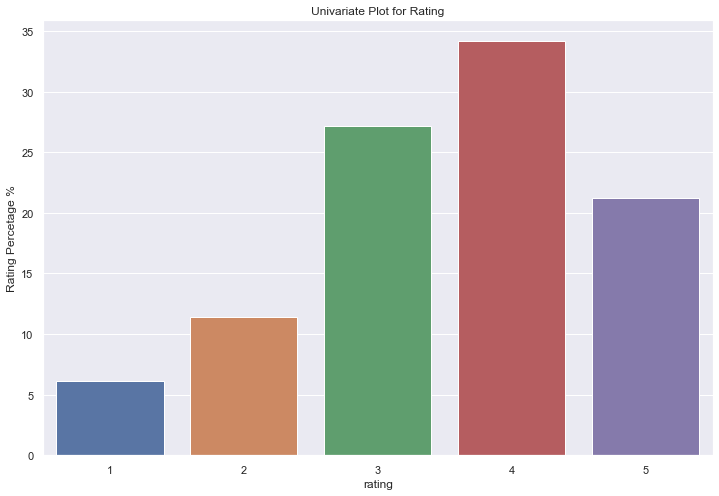

In [16]:
plt.figure(figsize=(12,8))
plt.title('Univariate Plot for Rating')
ax=sns.barplot(x="rating", y="rating", data = Rating, estimator=lambda rating: len(rating) / len(Rating)*100 )
ax.set(ylabel="Rating Percetage %")
plt.show()

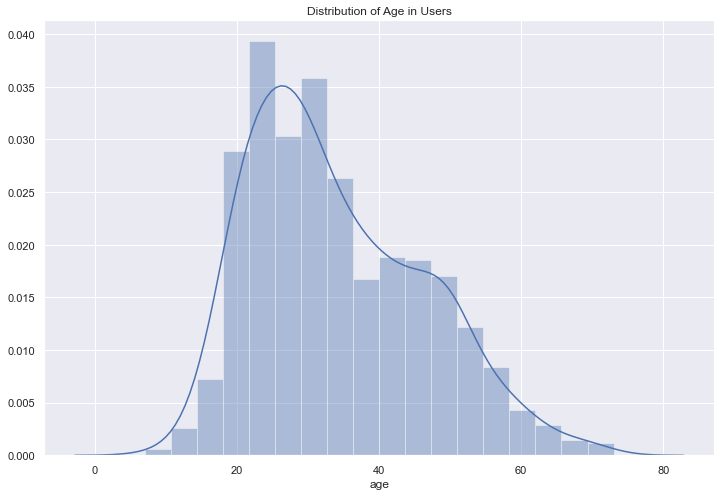

In [17]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Age in Users')
sns.distplot(User['age'], kde = True, rug = False);

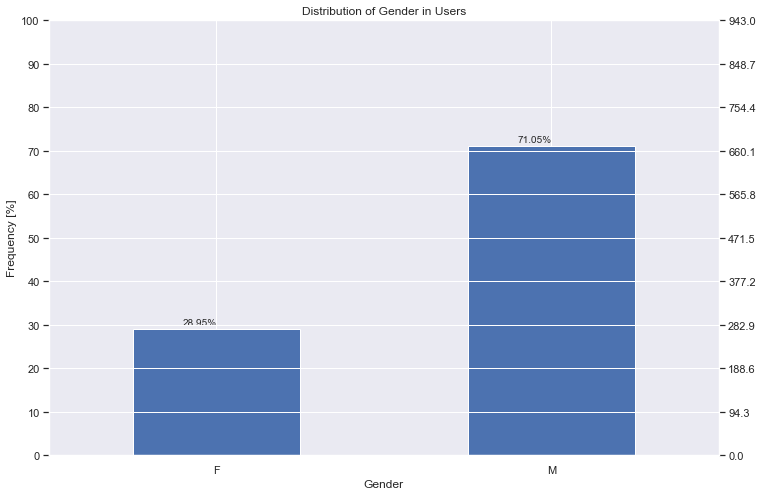

In [18]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Gender in Users')
plt.xlabel('Gender')
plt.ylabel('Frequency [%]')

ax = (User.gender.value_counts()/len(User)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(User)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

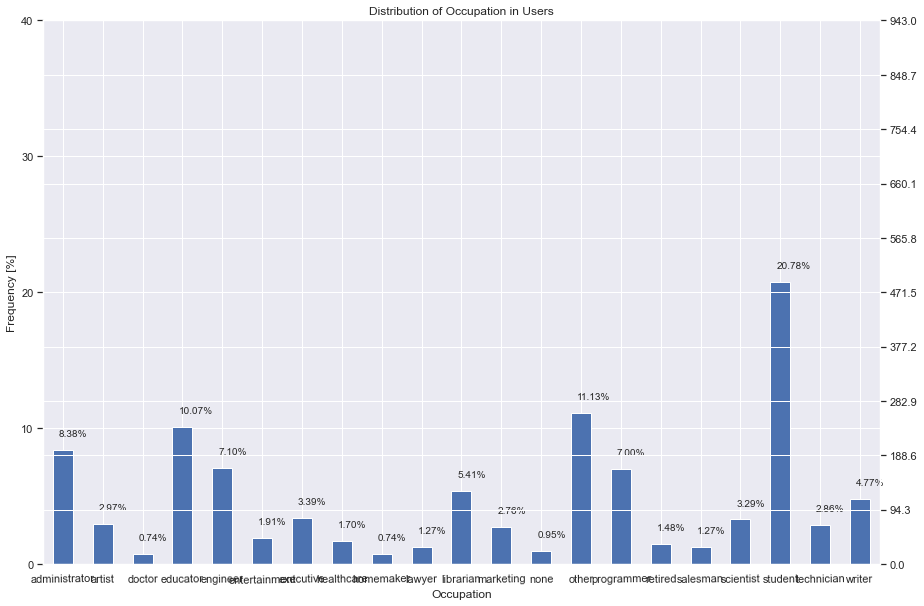

In [29]:
plt.figure(figsize=(15,10))

#For whatever reason, xticks did not rotate 90 degrees even though I used this statement

plt.title('Distribution of Occupation in Users')
plt.xlabel('Occupation')

plt.ylabel('Frequency [%]')

ax = (User.occupation.value_counts()/len(User)*100).sort_index().plot(kind="bar", rot=1)
ax.set_yticks(np.arange(0, 50, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(User)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation=90)
plt.show()
#For whatever reason, xticks did not rotate 90 degrees even though I used this statement

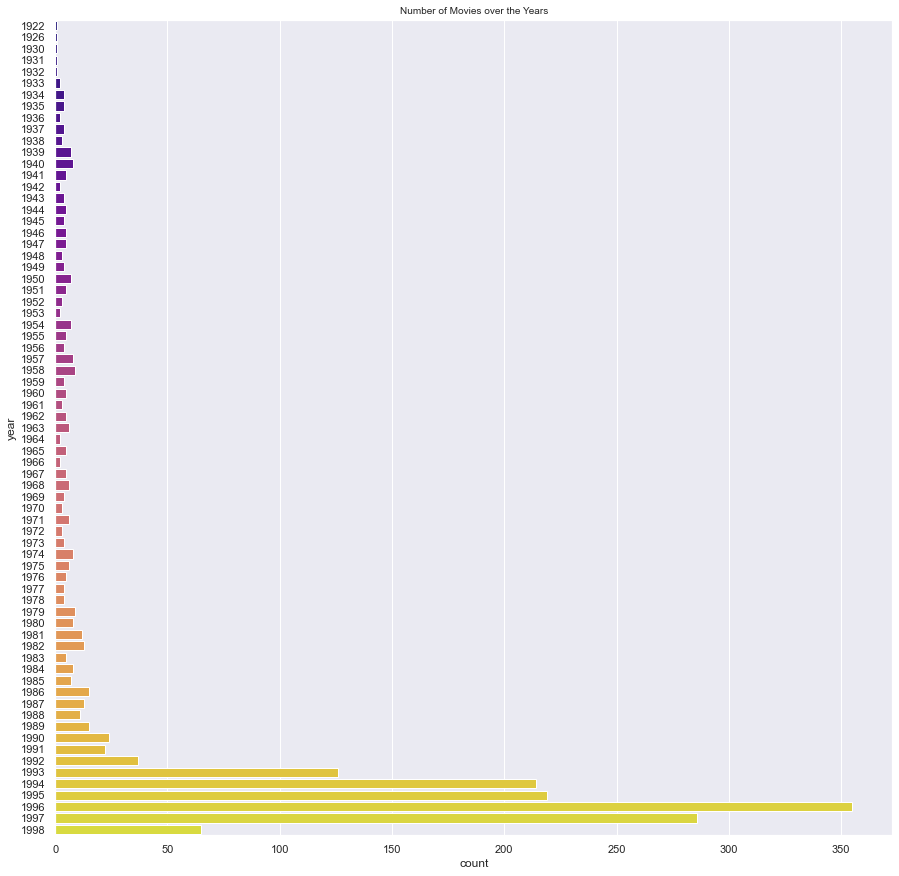

In [30]:
Movie['release date'] = Movie['release date'].astype(str)
year=pd.Series(range(0,len(Movie)))
Movie['year']=year
#
# The following code extracts the year from each row and removes " ' "
# that was attached when we converted date to string
#
for i in range (0,len(Movie)):
      dates = Movie.iloc[i,2]
      Movie.iloc[i,22]=(dates.split('-')[2]).replace('\'', '')
#
#Now using a countplot to show the graph
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax = sns.countplot(y='year', data=Movie, palette="plasma")
ax.set_title('Number of Movies over the Years', fontsize=10)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=5)
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

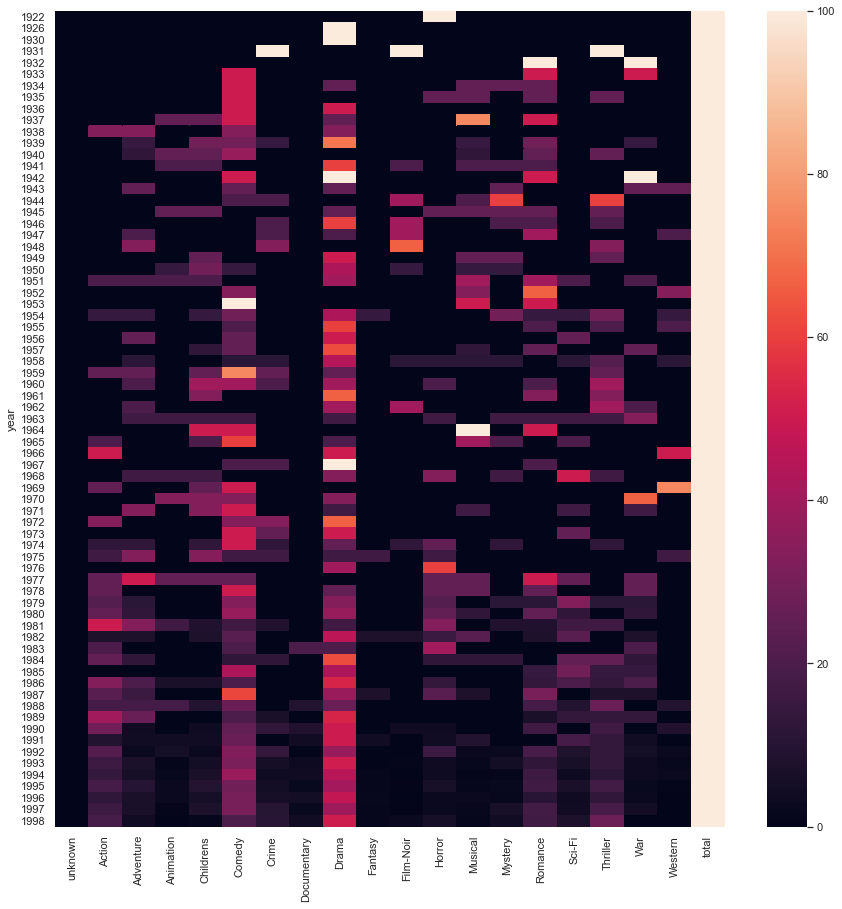

In [31]:
sorted_Movie = Movie.sort_values(by='year')
sorted_Movie.set_index('year', inplace=True)
sorted_Movie.drop(columns ='movie id', inplace=True)
sorted_Movie.drop(columns ='movie title', inplace=True)
sorted_Movie.drop(columns ='release date', inplace=True)
sorted_Movie['total'] = 1
#Convert each column
grouped=sorted_Movie.groupby("year")["unknown","Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary","Drama","Fantasy",
                                   "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi", "Thriller","War","Western","total" ].sum()

groupedper=(grouped.div(grouped['total'],axis=0)*100)
fig = plt.gcf()
fig.set_size_inches(15, 15)
sns.heatmap((grouped.div(grouped['total'],axis=0)*100),annot=False)
#See the heatmap to see the overall Genres over the years

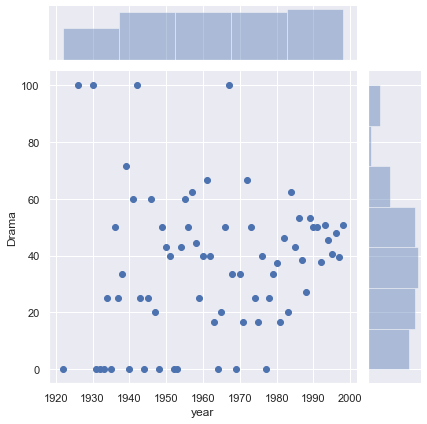

In [32]:
groupedper.reset_index(inplace=True)
groupedper['year'] = groupedper['year'].astype(int)
sns.jointplot(groupedper['year'], groupedper['Drama']);
#You can see that Drama has been popular several times through the years

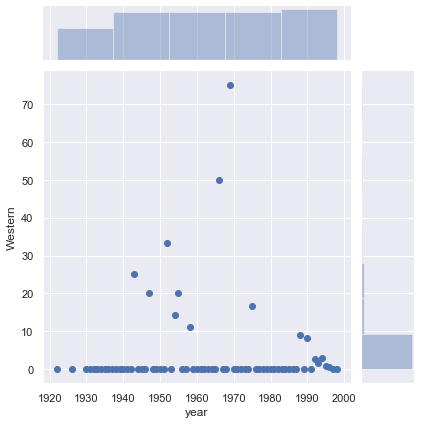

In [33]:
sns.jointplot(groupedper['year'], groupedper['Western']);
#Westerns were really popular around 1940-1960

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [34]:
count=Rating.groupby("movie id")["rating"].count()
average=Rating.groupby("movie id")["rating"].mean()
#count of ratings and average ratings have been found.
#Now we will merge these two data frames with Movie data frame to give more information
combined=pd.merge(count, average, how='outer', on='movie id')

more_than_hundred=combined[combined['rating_x'] > 100]
more_than_hundred
#The data frame more_than_hundred represents a slice of movies with more than 100 ratings

,rating_x,rating_y
movie id,,
1,452,3.878319
2,131,3.206107
4,209,3.550239
7,392,3.798469
8,219,3.995434
...,...,...
926,101,2.702970
928,104,3.115385
1016,137,3.459854


In [35]:
combined_name=pd.merge(combined, Movie, how='left',on ='movie id' )
sorted_list = combined_name.sort_values(by='rating_y',ascending=False)
print(sorted_list)
#Sorted list with highest average ranking movie at the top

      movie id  rating_x  rating_y  \
813        814         1       5.0   
1598      1599         1       5.0   
1200      1201         1       5.0   
1121      1122         1       5.0   
1652      1653         1       5.0   
...        ...       ...       ...   
1567      1568         1       1.0   
1566      1567         1       1.0   
1565      1566         1       1.0   
1564      1565         1       1.0   
851        852         1       1.0   

                                      movie title release date  unknown  \
813                       Great Day in Harlem, A   01-Jan-1994      0.0   
1598                      Someone Else's America   10-May-1996      0.0   
1200         Marlene Dietrich: Shadow and Light (  02-Apr-1996      0.0   
1121                     They Made Me a Criminal   01-Jan-1939      0.0   
1652  Entertaining Angels: The Dorothy Day Story   27-Sep-1996      0.0   
...                                           ...          ...      ...   
1567              

In [36]:
sorted_list[sorted_list['rating_x']>100].head(25)
#List of Top 25 movies with rating provided by more than 100 

,movie id,rating_x,rating_y,movie title,release date,unknown,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
407,408,112,4.491071,"Close Shave, A",28-Apr-1996,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1996
317,318,298,4.466443,Schindler's List,01-Jan-1993,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1993
168,169,118,4.466102,"Wrong Trousers, The",01-Jan-1993,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993
482,483,243,4.456790,Casablanca,01-Jan-1942,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1942
63,64,283,4.445230,"Shawshank Redemption, The",01-Jan-1994,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994
602,603,209,4.387560,Rear Window,01-Jan-1954,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1954
11,12,267,4.385768,"Usual Suspects, The",14-Aug-1995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995
49,50,583,4.358491,Star Wars,01-Jan-1977,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1977
177,178,125,4.344000,12 Angry Men,01-Jan-1957,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1957
133,134,198,4.292929,Citizen Kane,01-Jan-1941,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [37]:
df1=pd.merge(Rating, User, how='outer',on='user id')
df2=pd.merge(df1, Movie, how='outer', on='movie id')
#All 3 databases are merged
df2.head(15)

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
5,181,242,1,878961814,26,M,executive,21218,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
6,201,242,4,884110598,27,M,writer,E2A4H,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
7,249,242,5,879571438,25,M,student,84103,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
8,13,242,2,881515193,47,M,educator,29206,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
9,279,242,3,877756647,33,M,programmer,85251,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997


In [38]:
Men_tot=(df2[(df2['gender']=='M') ]).size
print('Size shows men who entered rating',Men_tot )
Women_tot=(df2[(df2['gender']=='F') ]).size
print('Size shows Females who entered rating',Women_tot)
#
#Note I am using size as a simple way to give an idea of number of rows or ratings, 
#(Men_tot + Women_tot) / 30 = 100,000 would be the actual number of ratings. 
#
print('Number of ratings:', (Men_tot+Women_tot)/30)

Size shows men who entered rating 2227800
Size shows Females who entered rating 772200
Number of ratings: 100000.0


In [39]:
Men_drama=(df2[(df2['Drama']==1)&(df2['gender']=='M') ]).size
a=Men_drama/Men_tot*100
print('Percentage of men who watch drama', a, '%' )
Women_drama=(df2[(df2['Drama']==1)&(df2['gender']=='F') ]).size
b=Women_drama/Women_tot*100
print('Percentage of Females who watch drama', b, '%')
print('Men watch more drama than women -->',(a>b))

Percentage of men who watch drama 38.89981147320226 %
Percentage of Females who watch drama 42.76612276612276 %
Men watch more drama than women --> False


In [40]:
Men_sci=(df2[(df2['Sci-Fi']==1)&(df2['gender']=='M') ]).size
a=Men_sci/Men_tot*100
print('Percentage of men who watch Sci-Fi', a, '%' )
Women_sci=(df2[(df2['Sci-Fi']==1)&(df2['gender']=='F') ]).size
b=Women_sci/Women_tot*100
print('Percentage of Females who watch Sci-Fi', b, '%')
print('Women watch more Sci-Fi than men -->',(b>a))

Percentage of men who watch Sci-Fi 13.602208456773498 %
Percentage of Females who watch Sci-Fi 10.213675213675213 %
Women watch more Sci-Fi than men --> False


In [41]:
Men_rom=(df2[(df2['Romance']==1)&(df2['gender']=='M') ]).size
a=Men_rom/Men_tot*100
print('Percentage of men who watch Romance', a, '%' )
Women_rom=(df2[(df2['Romance']==1)&(df2['gender']=='F') ]).size
b=Women_rom/Women_tot*100
print('Percentage of Females who watch Romance', b, '%')
print('Men watch more romance than women -->',(a>b))

Percentage of men who watch Romance 18.31807164018314 %
Percentage of Females who watch Romance 22.75835275835276 %
Men watch more romance than women --> False
